# QMSS 5074 final project
## UNI:kz2392


`

## 1.describe in detail the substantive problem you are interested in working on for this assignment

The problem is to build sequential models using RNN, GRUs, and LSTM model to predict Tesla future stock price.

The main objective is to see which sequential model performs best in TSLA stock prediction and what is the best combination of parameter (step, nuerons, epochs, etc.) for chosen model. In this case, I will adopt OOP and for loop to find the best performed model. Additionally, since the deep learning training process is extremely computational intensive, I will only choose several values in for loop based on my experience. Nevertheless, we can still walk through every values in range function as long as there is no limition on computation, time, and money.  

## 2.describe your data (including the features, target, and the general type of data you are working with)

Tesla historical stock price data is geting from yahoo finance API. Data is a  1261 rows × 7 columns dataframe which contains open, high, low, close, adjclose, volume, and ticker from May 10th 2017 to May 10th 2022. Adjclose is the only selected feature used in the training process because adjusted close price will eliminate the effect of fluctuation from stock split, reverse slitup, and etc. Additioanlly, adjclose price is the best feature to show the result of money change within a day.

In [4]:
from yahoo_fin.stock_info import *
data = get_data('TSLA', start_date='2017-05-10')

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data

open        high         low       close    adjclose  \
2017-05-10   64.311996   65.099998   63.624001   65.043999   65.043999   
2017-05-11   64.680000   65.199997   63.919998   64.620003   64.620003   
2017-05-12   65.096001   65.400002   64.306000   64.961998   64.961998   
2017-05-15   63.675999   64.040001   62.506001   63.175999   63.175999   
2017-05-16   63.518002   64.012001   63.028000   63.402000   63.402000   
...                ...         ...         ...         ...         ...   
2022-05-05  939.020020  945.599976  857.700012  873.280029  873.280029   
2022-05-06  887.000000  888.000000  843.109985  865.650024  865.650024   
2022-05-09  836.450012  845.630005  781.150024  787.109985  787.109985   
2022-05-10  819.309998  825.359985  774.250000  800.039978  800.039978   
2022-05-11  795.000000  809.690002  727.200012  734.000000  734.000000   

              volume ticker  
2017-05-10  28708000   TSLA  
2017-05-11  23769000   TSLA  
2017-05-12  20608000   TSLA  
2017-05-15  38110000   TSLA  
2017-05-16  20762500   TSLA  
...              ...    ...  
2022-05-05  30839700   TSLA  
2022-05-06  24264100   TSLA  
2022-05-09  30270100   TSLA  
2022-05-10  28133900   TSLA  
2022-05-11  31728612   TSLA  

[1261 rows x 7 columns]

In [177]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data_target = data.iloc[:1182,4]
data_test = data.iloc[1132:,4]
steps = 5
#return numpy representation of data
data = data.loc[:,["adjclose"]].values
test = data[len(data) - len(data_test) - steps:]
#4 the column is Adj Close

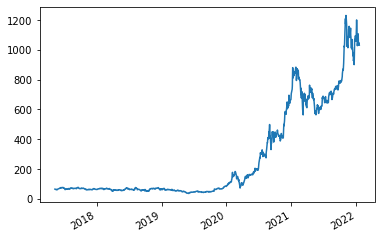

In [9]:
plot = data_target.plot()

In [78]:
#Scaling Dataset
def scaledata(data_target):
    #Import scaler and initialise it
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    #transform by converting it to array and shape of (-1,1)
    data_target_scaled = scaler.fit_transform(np.array(data_target).reshape(-1,1))
    #plot the scaled version of data
    plot_scaled = pd.DataFrame(data_target_scaled).plot()
    print(data_target.shape)
    #returns scaled data
    return data_target_scaled, scaler

(1182,)


(array([[0.02449511],
        [0.02414004],
        [0.02442644],
        ...,
        [0.83389388],
        [0.84900961],
        [0.83301453]]),
 MinMaxScaler())

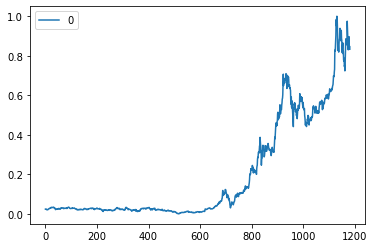

In [79]:
scaledata(data_target)

In [80]:
#Create pattern and end price set
def createPatternSet(data_target_scaled,steps=5):   
    x_patern = []  #Independent Variable
    y_price = []   #Dependent Variable
    for day in range(steps,data_target_scaled.shape[0]):#5-1182
        row = data_target_scaled[day-steps:day,0]#0:1182
        #print(len(row))
        x_patern.append(row)
        y = data_target_scaled[day,0]#
        #print(y)
        y_price.append(y)
    
    x_patern,y_price = np.array(x_patern),np.array(y_price)
    #RNN and LSTM takes 3D inputs, we need to change the shape of array to 3 dimensional.
    x_patern = x_patern.reshape(x_patern.shape[0],x_patern.shape[1],1)
    #returns independent and dependent variable sets
    return x_patern,y_price

(1182,)
(1182,)


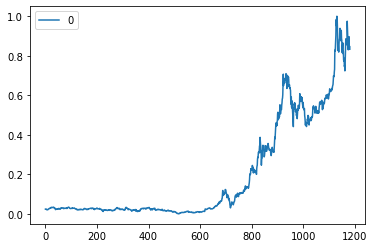

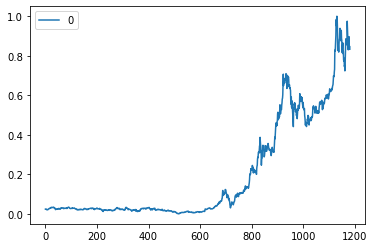

In [81]:
#Scale Down Target
data_target_scaled = scaledata(data_target)[0]
scaler = scaledata(data_target)[1]
#prepare test data
test = data[len(data) - len(data_test) - steps:]
test = scaler.transform(test)

In [118]:
#Overwrite steps to 50.
train_pattern = createPatternSet(data_target_scaled,steps=50)
x_train = train_pattern[0]
y_train = train_pattern[1]


In [119]:
x_train.shape

(1132, 50, 1)

In [121]:
y_test.shape

(129,)

## 3.describe why you think Deep Learning systems would be a good methodological choice, and the specific architecture(s) you think appropriate to explore

RNN are a class of deeping networks that is powerful for modeling sequence data such as video, natural language, and time series. It is reasonable to use it to predict stock price because RNN will remember the price with a particular sequence and model will train to find the pattern based on that sequence. However, RNN can retain sequence patterns only for a short period of time. In that case, I will also move to Long and Short Term memory which is able to memorize the data points over a longer period of time. Besides, LSTM network contains of cell, input gate, output gate and a forget gate which regulate the information in and out of the cell that holds value over arbitrary time. In this case, model will capture any necessary pattern over a long time to make a better prediction on stock price.  

For RNN, I built a simple RNN followed by a dropout layer to eliminate the overfit, then i repeated this process for 4 times and have an output value given by dense layer. Additionally, I set up batch size to 32 and 50 neurons based on results of mutiple experiences. Then I run for loop with different parameters passed and analyze the results. For LSTM, it inherit the previous RNN class attribute and overwirte the architecture with simple LSTM followed by a dense layer to give an output value.I also run for loop with different paramters passed and analyze the results. For GRUs, it still ingerit the previous RNN class attribute and overwrite the architecture with GRUs followed by a dense layer to give an output value. A for loop with different paramters is implemented with this model. The reason to adopt basic architecture is that the other model such as nested LSTM is not performed much better than the simple one.

## 4.show the code and outputs of 3-5 different experiments with variants of your proposed architecture(s)

In [140]:
class StocksPriceRNN():

    loss='mean_squared_error'
    batch_size=32
    neurons = 50
    model = tf.keras.Sequential()
    def __init__(self,x_train,y_train,epoch):
        self.x_train = x_train
        self.y_train = y_train
        self.epoch = epoch
    
    def buildArchitecture(self,rnn=2,dense=1):
        StocksPriceRNN.model = tf.keras.Sequential()
        StocksPriceRNN.model.add(tf.keras.layers.SimpleRNN(StocksPriceRNN.neurons,
                                            activation='tanh',
                                            return_sequences = True,
                                            input_shape = (self.x_train.shape[1],1)))
        StocksPriceRNN.model.add(tf.keras.layers.Dropout(0.2))
        for i in range(rnn):
            StocksPriceRNN.model.add(tf.keras.layers.SimpleRNN(StocksPriceRNN.neurons,
                                                activation='tanh',
                                                return_sequences = True))
            StocksPriceRNN.model.add(tf.keras.layers.Dropout(0.2))
        
        #return sequense changed to false
        StocksPriceRNN.model.add(tf.keras.layers.SimpleRNN(StocksPriceRNN.neurons,
                                                activation='tanh',
                                                return_sequences = False))
        StocksPriceRNN.model.add(tf.keras.layers.Dropout(0.2))
        
        for i in range(dense):
            StocksPriceRNN.model.add(tf.keras.layers.Dense(units=StocksPriceRNN.neurons,
                                            activation='tanh'))
        
        #Output
        StocksPriceRNN.model.add(tf.keras.layers.Dense(units=1))
        return StocksPriceRNN.model.summary()
    
    def compiler(self):
        opt= tf.keras.optimizers.Adam()
        StocksPriceRNN.model.compile(optimizer = opt,
                                    loss = StocksPriceRNN.loss)
        return StocksPriceRNN.model.summary()
        
    def modelfit(self):
        history = StocksPriceRNN.model.fit(self.x_train,self.y_train,
                                        epochs=self.epoch,batch_size=StocksPriceRNN.batch_size,validation_split=0.2,
                                       )
        return history
    
    def changeBatchSize(self,size):
        StocksPriceRNN.batch_size = size
        print("Changed!")
    def changeNeurons(self,size):
        StocksPriceRNN.neurons = size
        print("Changed!")
    def changeEpoch(self,size):
        self.epoch = size
        print("Changed!")

### RNN Model

In [141]:
RNN1 = StocksPriceRNN(x_train,y_train,50)

In [142]:
RNN1.buildArchitecture(2,0)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_108 (SimpleRNN)  (None, 50, 50)            2600      
                                                                 
 dropout_108 (Dropout)       (None, 50, 50)            0         
                                                                 
 simple_rnn_109 (SimpleRNN)  (None, 50, 50)            5050      
                                                                 
 dropout_109 (Dropout)       (None, 50, 50)            0         
                                                                 
 simple_rnn_110 (SimpleRNN)  (None, 50, 50)            5050      
                                                                 
 dropout_110 (Dropout)       (None, 50, 50)            0         
                                                                 
 simple_rnn_111 (SimpleRNN)  (None, 50)              

In [125]:
RNN1.compiler()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_68 (SimpleRNN)   (None, 50, 50)            2600      
                                                                 
 dropout_68 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_69 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 dropout_69 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_70 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 dropout_70 (Dropout)        (None, 50, 50)            0         
                                                                 
 simple_rnn_71 (SimpleRNN)   (None, 50)              

In [126]:
history = RNN1.modelfit()

Epoch 1/50
29/29 [==============================] - 16s 169ms/step - loss: 0.2506 - val_loss: 0.1271
Epoch 2/50
29/29 [==============================] - 3s 111ms/step - loss: 0.1451 - val_loss: 0.0126
Epoch 3/50
29/29 [==============================] - 2s 84ms/step - loss: 0.0892 - val_loss: 0.0194
Epoch 4/50
29/29 [==============================] - 3s 87ms/step - loss: 0.0506 - val_loss: 0.0132
Epoch 5/50
29/29 [==============================] - 3s 90ms/step - loss: 0.0341 - val_loss: 0.0050
Epoch 6/50
29/29 [==============================] - 3s 92ms/step - loss: 0.0225 - val_loss: 0.0047
Epoch 7/50
29/29 [==============================] - 3s 89ms/step - loss: 0.0198 - val_loss: 0.0047
Epoch 8/50
29/29 [==============================] - 3s 92ms/step - loss: 0.0188 - val_loss: 0.0155
Epoch 9/50
29/29 [==============================] - 3s 87ms/step - loss: 0.0154 - val_loss: 0.0272
Epoch 10/50
29/29 [==============================] - 3s 91ms/step - loss: 0.0146 - val_loss: 0.0340
Epoch 

In [127]:
#Prepare Test Data
test = data[len(data) - len(data_test) - 50:]
test = scaler.transform(test)

In [128]:
test_pattern = createPatternSet(test,steps=50)
x_test = test_pattern[0]
y_test = test_pattern[1]

In [129]:
x_test

array([[[0.55720378],
        [0.56621464],
        [0.58211761],
        ...,
        [0.95150385],
        [0.98655905],
        [1.        ]],

       [[0.56621464],
        [0.58211761],
        [0.58614569],
        ...,
        [0.98655905],
        [1.        ],
        [0.99345117]],

       [[0.58211761],
        [0.58614569],
        [0.58478071],
        ...,
        [1.        ],
        [0.99345117],
        [0.9439166 ]],

       ...,

       [[0.64824186],
        [0.69895719],
        [0.69388231],
        ...,
        [0.76778635],
        [0.70134393],
        [0.69495426]],

       [[0.69895719],
        [0.69388231],
        [0.70687939],
        ...,
        [0.70134393],
        [0.69495426],
        [0.62918172]],

       [[0.69388231],
        [0.70687939],
        [0.67287931],
        ...,
        [0.69495426],
        [0.62918172],
        [0.64000981]]])

In [130]:
y_test

array([0.99345117, 0.9439166 , 0.82714407, 0.86436822, 0.86065004,
       0.83545151, 0.81867757, 0.85329729, 0.88200475, 0.88817667,
       0.92224376, 0.93883338, 0.8987703 , 0.90460723, 0.87606733,
       0.92218508, 0.928692  , 0.887021  , 0.87831161, 0.82000069,
       0.81500958, 0.85080174, 0.86521404, 0.8106465 , 0.82172586,
       0.77933463, 0.77271888, 0.78735731, 0.74626415, 0.7509957 ,
       0.72367004, 0.75598686, 0.81489233, 0.86357269, 0.88613327,
       0.8815525 , 0.87964311, 0.86636971, 0.85501409, 0.97476794,
       0.9327368 , 0.88125941, 0.86164654, 0.83004158, 0.85613623,
       0.86139537, 0.89641705, 0.83389388, 0.84900961, 0.83301453,
       0.8038214 , 0.80434061, 0.76048391, 0.74884347, 0.7391292 ,
       0.75504888, 0.6643458 , 0.67879164, 0.75447104, 0.74989027,
       0.72846017, 0.71630059, 0.74324938, 0.72986712, 0.74214396,
       0.75051835, 0.72753063, 0.69022271, 0.70342076, 0.74250405,
       0.74330801, 0.70391482, 0.68769362, 0.65800643, 0.60986

In [131]:
pred = RNN1.model.predict(x=x_test)
pred.shape

(129, 1)

In [132]:
#Transform back the inverse value
output = scaler.inverse_transform(pred)
org_vals = scaler.inverse_transform(y_test.reshape(-1,1))

In [133]:
output

array([[1168.9093 ],
       [1194.3829 ],
       [1188.7977 ],
       [1172.6251 ],
       [1168.5548 ],
       [1133.2943 ],
       [1120.4347 ],
       [1090.2125 ],
       [1097.5864 ],
       [1096.995  ],
       [1092.6047 ],
       [1105.2964 ],
       [1109.3763 ],
       [1125.8779 ],
       [1134.8662 ],
       [1128.0928 ],
       [1125.5118 ],
       [1136.4108 ],
       [1142.6123 ],
       [1137.7852 ],
       [1125.2382 ],
       [1120.5892 ],
       [1098.4264 ],
       [1097.7007 ],
       [1087.1001 ],
       [1075.5071 ],
       [1074.4697 ],
       [1058.9785 ],
       [1050.2849 ],
       [1032.9333 ],
       [1019.04944],
       [1009.42084],
       [1014.82825],
       [ 992.70294],
       [1018.267  ],
       [1048.9803 ],
       [1070.587  ],
       [1096.8695 ],
       [1097.869  ],
       [1111.8525 ],
       [1123.1027 ],
       [1135.2836 ],
       [1134.5673 ],
       [1141.6132 ],
       [1139.3407 ],
       [1121.8881 ],
       [1112.7164 ],
       [1115.

In [134]:
def plotting(org_vals,output):
    plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(org_vals,color="Black",label="Original value")
    plt.plot(output,color="Skyblue",label="Predicted")
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

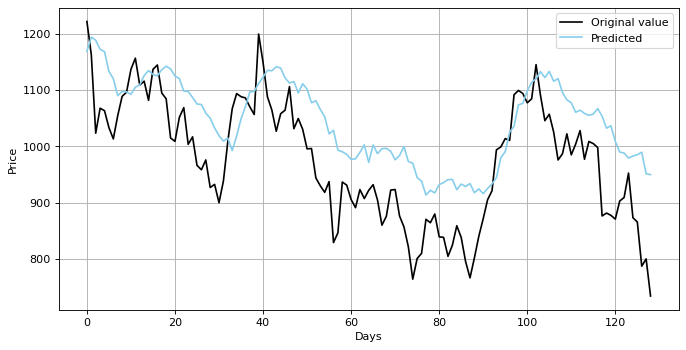

In [135]:
plotting(org_vals,output)

In [136]:
# Find the best hyperparameter for RNN Model

In [145]:
#Build a for loop with some iterations
for steps in [50,70,90]:
    for epoch in [20,30,50]:
        #prepare train data
        train_pattern = createPatternSet(data_target_scaled,steps=steps)
        #prepare test data
        test = data[len(data) - len(data_test) - steps:]
        test = scaler.transform(test)

        test_pattern = createPatternSet(test,steps=steps)
        x_test = test_pattern[0]
        y_test = test_pattern[1]
        #Build Model
        RNN1 = StocksPriceRNN(x_train,y_train,epoch)
        RNN1.buildArchitecture(2,0)
        RNN1.compiler()
        #fit model
        history = RNN1.modelfit()
        #Predict Values
        pred = RNN1.model.predict(x_test)
        output = scaler.inverse_transform(pred)
        
        #visualise
        print("Plotting for Steps {} and Epoch {}".format(steps,epoch))
        plotting(org_vals,output)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_120 (SimpleRNN)  (None, 50, 50)            2600      
                                                                 
 dropout_120 (Dropout)       (None, 50, 50)            0         
                                                                 
 simple_rnn_121 (SimpleRNN)  (None, 50, 50)            5050      
                                                                 
 dropout_121 (Dropout)       (None, 50, 50)            0         
                                                                 
 simple_rnn_122 (SimpleRNN)  (None, 50, 50)            5050      
                                                                 
 dropout_122 (Dropout)       (None, 50, 50)            0         
                                                                 
 simple_rnn_123 (SimpleRNN)  (None, 50)              

ValueError: in user code:

    File "C:\Users\Think Pad\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Think Pad\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Think Pad\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Think Pad\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\Think Pad\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Think Pad\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_39" is incompatible with the layer: expected shape=(None, 50, 1), found shape=(None, 30, 1)


### LSTM Model

In [146]:
class LstmModel(StocksPriceRNN):
    StocksPriceRNN.model = tf.keras.Sequential()
    def __init__(self,x_train,y_train,epoch):
        super().__init__(x_train,y_train,epoch)
    
    def buildArchitecture(self,dense=1):
        StocksPriceRNN.model = tf.keras.Sequential()
        StocksPriceRNN.model.add(tf.keras.layers.LSTM(
                                 StocksPriceRNN.neurons,
                                 input_shape=(None,1)))
        #Output
        StocksPriceRNN.model.add(tf.keras.layers.Dense(units=1))
        return StocksPriceRNN.model.summary()

In [147]:
LSTM = LstmModel(x_train,y_train,epoch=50)

In [148]:
LSTM.changeBatchSize(1)

Changed!


In [149]:
LSTM.changeNeurons(10)

Changed!


In [150]:
LSTM.buildArchitecture()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [151]:
LSTM.compiler()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [152]:
history = LSTM.modelfit()

Epoch 1/50
905/905 [==============================] - 29s 24ms/step - loss: 0.0059 - val_loss: 0.0101
Epoch 2/50
905/905 [==============================] - 20s 22ms/step - loss: 6.5001e-04 - val_loss: 0.0055
Epoch 3/50
905/905 [==============================] - 21s 24ms/step - loss: 5.3689e-04 - val_loss: 0.0049
Epoch 4/50
905/905 [==============================] - 22s 24ms/step - loss: 4.0698e-04 - val_loss: 0.0042
Epoch 5/50
905/905 [==============================] - 22s 25ms/step - loss: 3.1256e-04 - val_loss: 0.0029
Epoch 6/50
905/905 [==============================] - 22s 24ms/step - loss: 3.0069e-04 - val_loss: 0.0028
Epoch 7/50
905/905 [==============================] - 22s 24ms/step - loss: 2.7529e-04 - val_loss: 0.0018
Epoch 8/50
905/905 [==============================] - 22s 24ms/step - loss: 2.4139e-04 - val_loss: 0.0017
Epoch 9/50
905/905 [==============================] - 21s 24ms/step - loss: 2.0735e-04 - val_loss: 0.0032
Epoch 10/50
905/905 [=============================

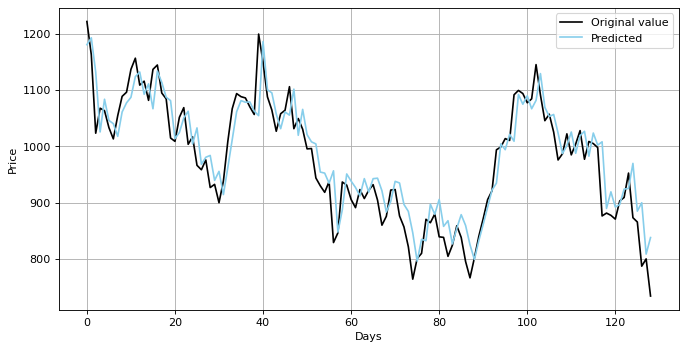

In [153]:
pred = LSTM.model.predict(x_test)
output = scaler.inverse_transform(pred)

plotting(org_vals,output)

Changed!
Changed!
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8)                 320       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8)                 320       
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

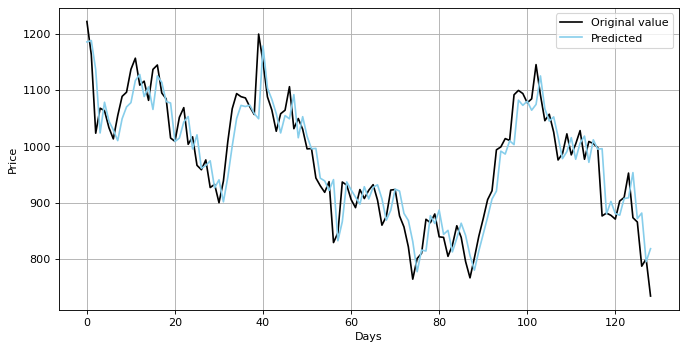

Changed!
Changed!
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

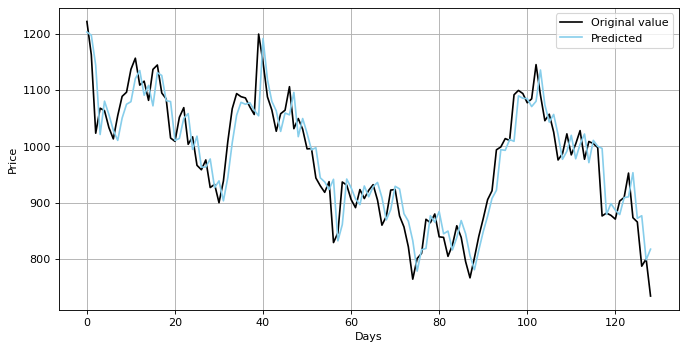

Changed!
Changed!
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12)                672       
                                                                 
 dense_36 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12)                672       
                                                                 
 dense_36 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

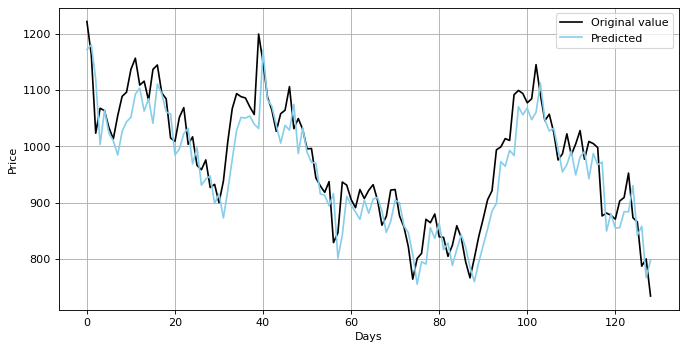

Changed!
Changed!
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 8)                 320       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 8)                 320       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

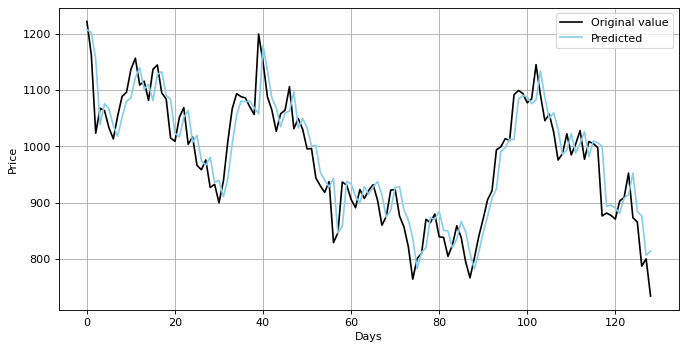

Changed!
Changed!
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10)                480       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10)                480       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

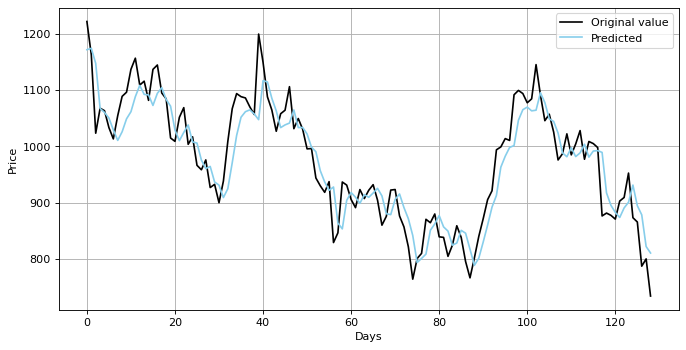

Changed!
Changed!
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 12)                672       
                                                                 
 dense_39 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 12)                672       
                                                                 
 dense_39 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

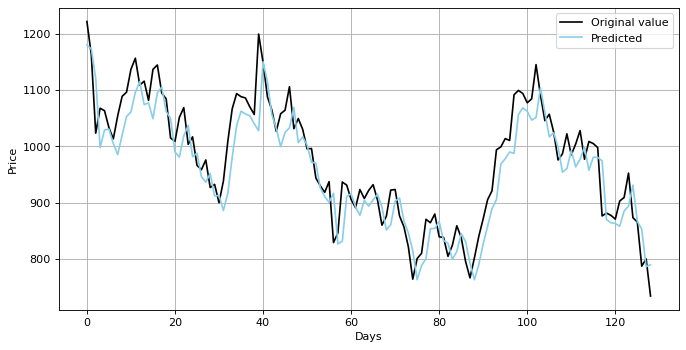

Changed!
Changed!
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 8)                 320       
                                                                 
 dense_40 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 8)                 320       
                                                                 
 dense_40 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

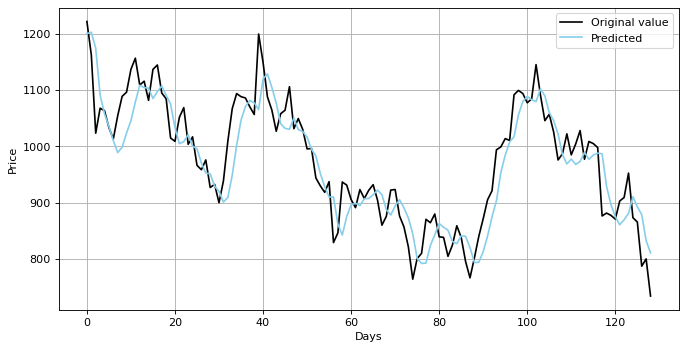

Changed!
Changed!
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10)                480       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10)                480       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

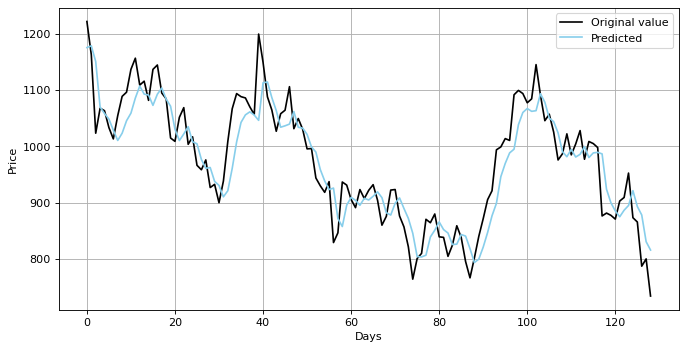

Changed!
Changed!
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 12)                672       
                                                                 
 dense_42 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 12)                672       
                                                                 
 dense_42 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

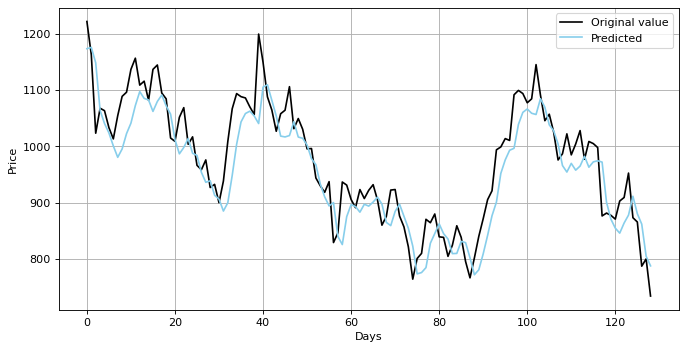

Changed!
Changed!
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 8)                 320       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 8)                 320       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

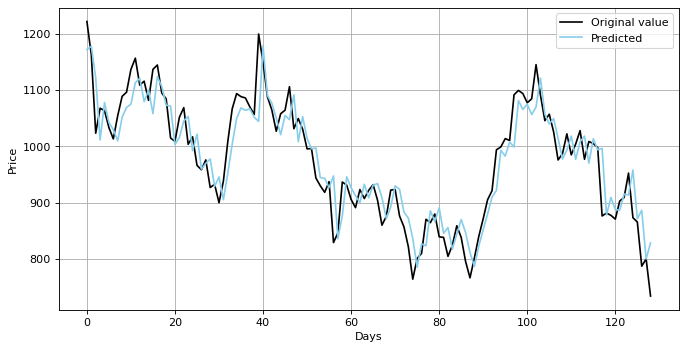

Changed!
Changed!
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10)                480       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10)                480       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

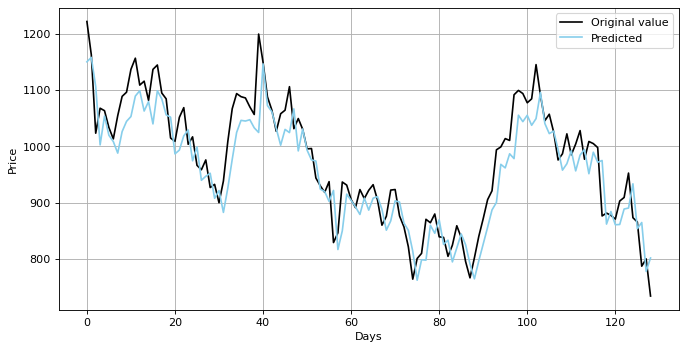

Changed!
Changed!
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 12)                672       
                                                                 
 dense_45 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 12)                672       
                                                                 
 dense_45 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

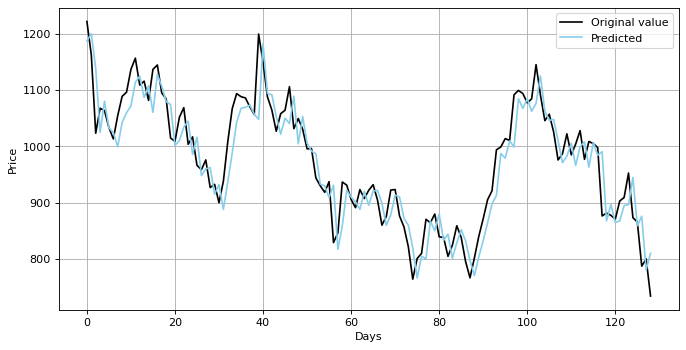

Changed!
Changed!
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 8)                 320       
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 8)                 320       
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

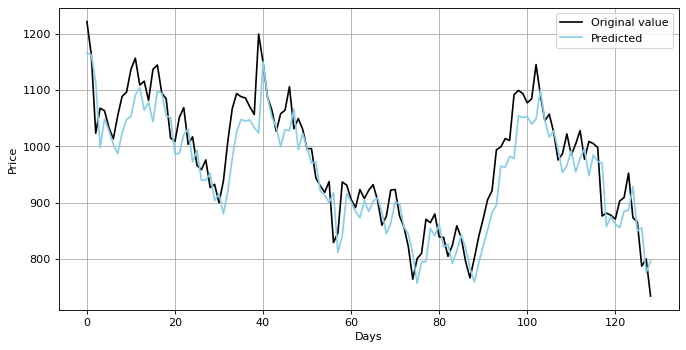

Changed!
Changed!
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10)                480       
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10)                480       
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

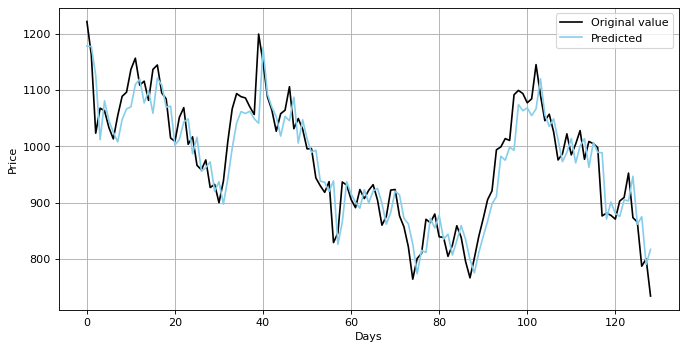

Changed!
Changed!
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 12)                672       
                                                                 
 dense_48 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 12)                672       
                                                                 
 dense_48 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

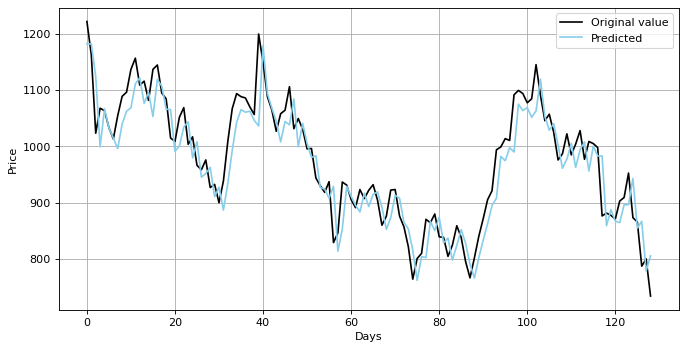

Changed!
Changed!
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 8)                 320       
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 8)                 320       
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

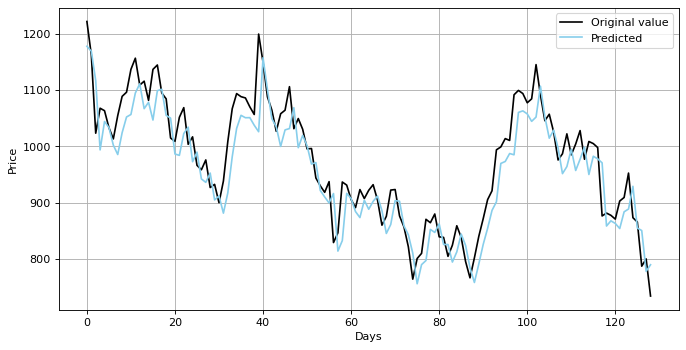

Changed!
Changed!
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10)                480       
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10)                480       
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

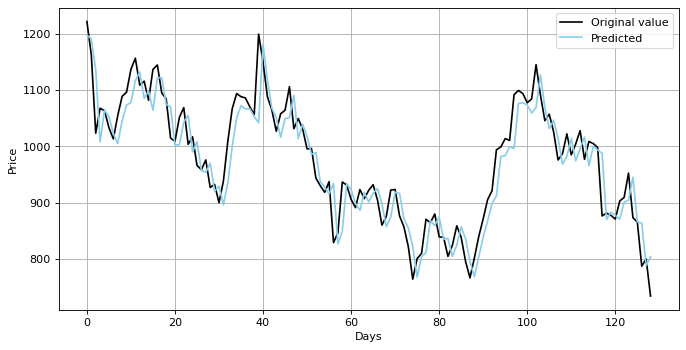

Changed!
Changed!
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 12)                672       
                                                                 
 dense_51 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 12)                672       
                                                                 
 dense_51 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

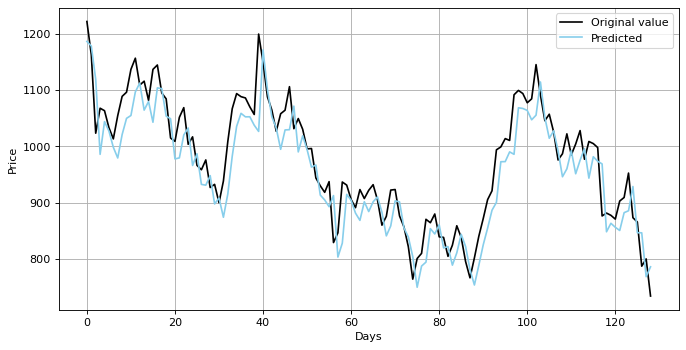

Changed!
Changed!
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 8)                 320       
                                                                 
 dense_52 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 8)                 320       
                                                                 
 dense_52 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

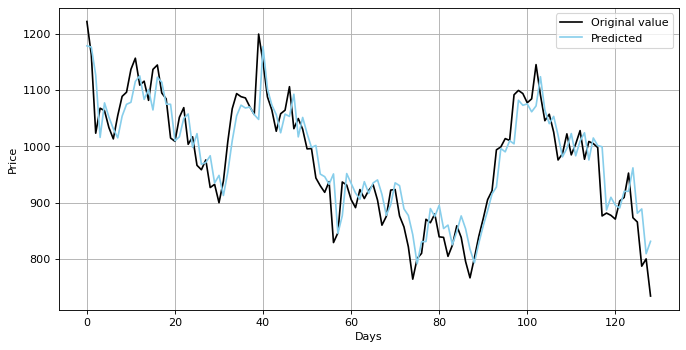

Changed!
Changed!
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10)                480       
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10)                480       
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

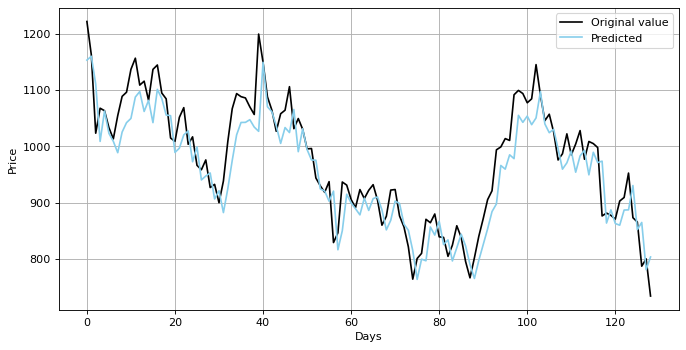

Changed!
Changed!
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 12)                672       
                                                                 
 dense_54 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 12)                672       
                                                                 
 dense_54 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

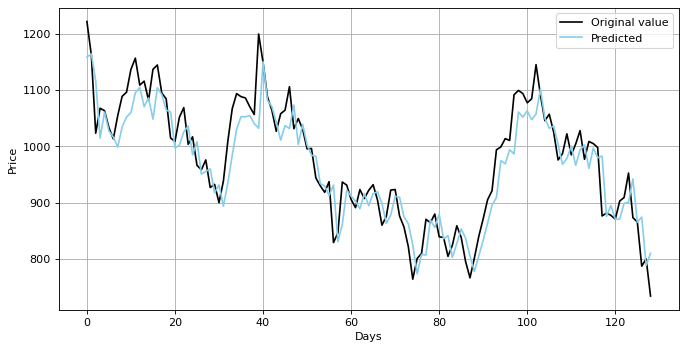

Changed!
Changed!
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 8)                 320       
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 8)                 320       
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

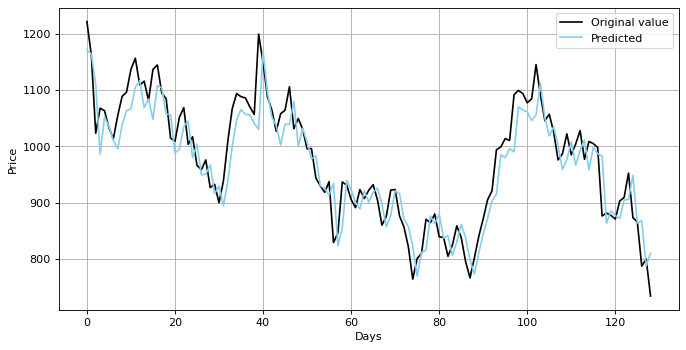

Changed!
Changed!
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10)                480       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10)                480       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

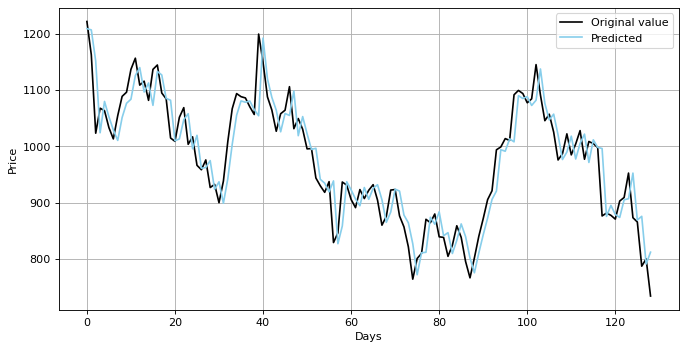

Changed!
Changed!
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 12)                672       
                                                                 
 dense_57 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 12)                672       
                                                                 
 dense_57 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

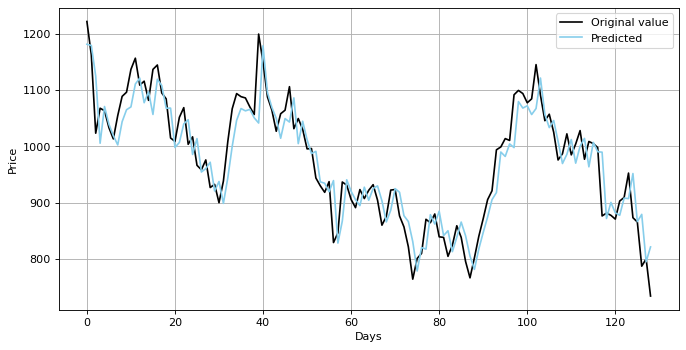

Changed!
Changed!
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 8)                 320       
                                                                 
 dense_58 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 8)                 320       
                                                                 
 dense_58 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

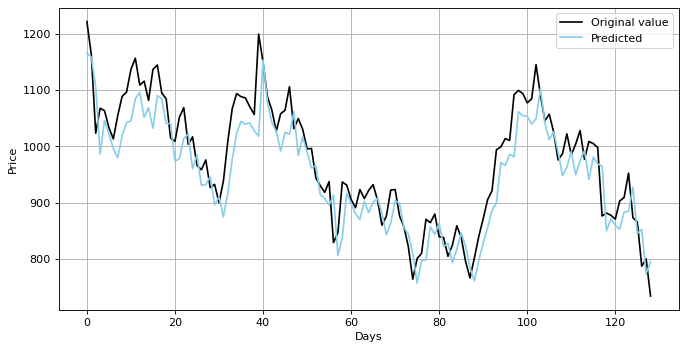

Changed!
Changed!
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10)                480       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10)                480       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

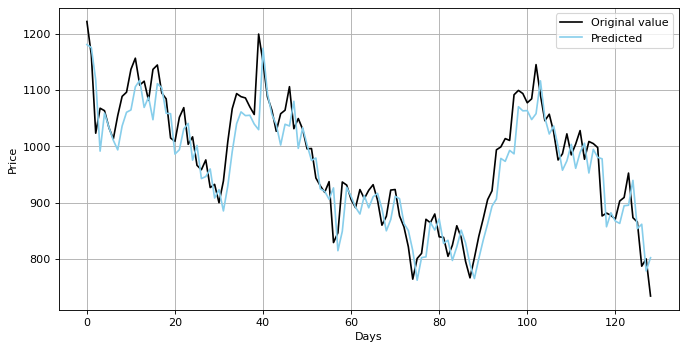

Changed!
Changed!
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 12)                672       
                                                                 
 dense_60 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 12)                672       
                                                                 
 dense_60 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

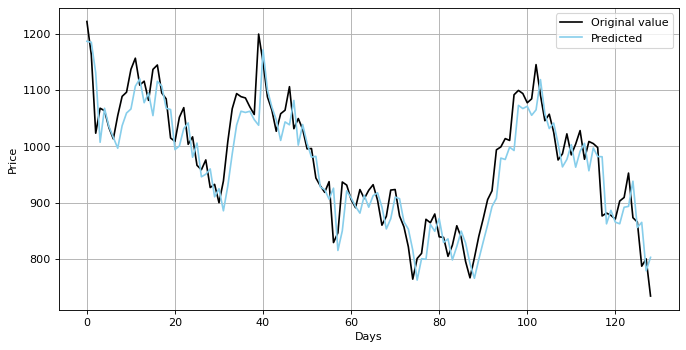

In [155]:
for epoch in [60,100,120]:
    for batch in [2,4,6]:
        for neurons in [8,10,12]:
            LSTM2 = LstmModel(x_train,y_train,epoch=epoch)
            LSTM2.changeBatchSize(batch)
            LSTM2.changeNeurons(neurons)

            LSTM2.buildArchitecture()
            LSTM2.compiler()
            history = LSTM2.modelfit()

            pred = LSTM2.model.predict(x_test)
            output = scaler.inverse_transform(pred)
            

            print("For epch {} and batch {}".format(epoch,batch))
            plotting(org_vals,output)

## 5.select the model that best fits the problem you are trying to solve and discuss why it fulfills this purpose

LSTM Model with steps 90, epoch 120, batch szie 2, and neuron 10 is the best model. As aforementioned, RNN can retain sequence patterns only for a short period of time, however, time series sequence like historical stock price usually has cyclical pattern over a long period of time which can't be capture by RNN. Therefore I move to Long and Short Term memory which is able to memorize the data points over a longer period of time. Besides, LSTM network contains of cell, input gate, output gate and a forget gate which regulate the information in and out of the cell that holds value over arbitrary time. In this case, model will capture any necessary pattern such as cyclincal, sesonal, and trend pattern over a long time, meanwhile, gates are able to drop any unnecessary pattern to eliminate the overfit. As for hyperparamters, I used OOP and for loop to indetify the best combination with several chosen values. The lower loss function value and higher accurary of LSTM model indicates it is outweights the other two models in terms of stock prediction.

### Best Model: LSTM Model with best combination of parameters

Changed!
Changed!
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 10)                480       
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 10)                480       
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

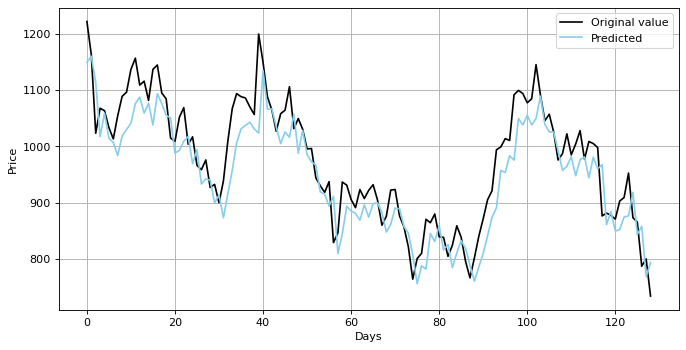

In [157]:
import warnings
warnings.filterwarnings('ignore')

#Final Model Output
#prepare train data
train_pattern = createPatternSet(data_target_scaled,steps=90)
test = data[len(data) - len(data_test) - 90:]
test = scaler.transform(test)
test_pattern = createPatternSet(test,steps=90)
x_test = test_pattern[0]
y_test = test_pattern[1]
LSTM2 = LstmModel(x_train,y_train,epoch=120)
LSTM2.changeBatchSize(2)
LSTM2.changeNeurons(10)

LSTM2.buildArchitecture()
LSTM2.compiler()
history = LSTM2.modelfit()
pred = LSTM2.model.predict(x_test)
pred = scaler.inverse_transform(pred)
org_vals = scaler.inverse_transform(y_test.reshape(-1,1))
print("For epch {}, neurons {} and batch {}".format(120,10,2))
plotting(org_vals,pred)

In [158]:
# Future Predictions

In [166]:
curr_data = get_data('TSLA', start_date='2021-05-11',end_date='2021-09-11')
print("Length of Data: ",len(curr_data))
curr_data = curr_data["adjclose"]

def futurePrediciton1D(curr_data,start="2022-05-11",end='2022-08-11'):
    '''
    '''
    curr_scaled = scaledata(curr_data)[0]
    scaler = scaledata(curr_data)[1]
    
    #flatten into list
    x_data = list(curr_scaled.flatten())
    #convert into 3D
    x_data = np.array(x_data)
    x_data = x_data.reshape(1,len(x_data),1)
    
    #Predict
    nextDay = LSTM2.model.predict(x=x_data)
    nextDay = scaler.inverse_transform(nextDay.reshape(-1,1))

    nextDay = nextDay[-1][0]
    print("Prediction: {}".format(nextDay))
    
    #convert into dataframe again
    curr_data = pd.DataFrame(curr_data)
    curr_data.reset_index(inplace=True)
    adj_cl = curr_data[['adjclose']]
    
    #concatenate new value
    adj_cl.loc[len(adj_cl.index)] = [nextDay]
    
    return adj_cl

Length of Data:  86


(86,)
(86,)
Prediction: 729.344482421875


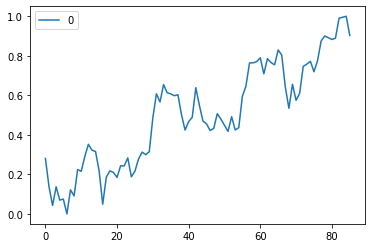

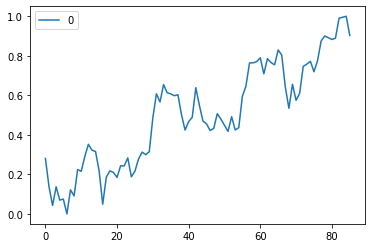

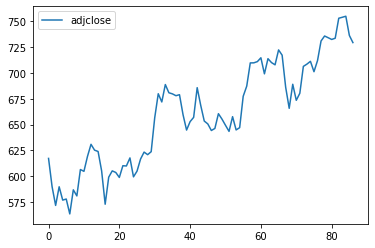

In [167]:
data = futurePrediciton1D(curr_data)
plot = data.plot()

### GRUs Model

In [168]:
class GRUsModel(StocksPriceRNN):
    StocksPriceRNN.model = tf.keras.Sequential()
    def __init__(self,x_train,y_train,epoch):
        super().__init__(x_train,y_train,epoch)
    
    def buildArchitecture(self,dense=1):
        StocksPriceRNN.model = tf.keras.Sequential()
        StocksPriceRNN.model.add(tf.keras.layers.GRU(
                                 StocksPriceRNN.neurons,
                                 input_shape=(None,1)))
        #Output
        StocksPriceRNN.model.add(tf.keras.layers.Dense(units=1))
        return StocksPriceRNN.model.summary()

In [169]:
GRUs = GRUsModel(x_train,y_train,epoch=50)

In [170]:
GRUs.changeBatchSize(1)

Changed!


In [171]:
GRUs.changeNeurons(10)

Changed!


In [172]:
GRUs.buildArchitecture()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                390       
                                                                 
 dense_62 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [173]:
GRUs.compiler()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                390       
                                                                 
 dense_62 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [174]:
history = GRUs.modelfit()

Epoch 1/50
905/905 [==============================] - 33s 29ms/step - loss: 1.5662e-04 - val_loss: 8.4080e-04
Epoch 2/50
905/905 [==============================] - 28s 31ms/step - loss: 1.4046e-04 - val_loss: 8.1555e-04
Epoch 3/50
905/905 [==============================] - 24s 27ms/step - loss: 1.3636e-04 - val_loss: 7.1063e-04
Epoch 4/50
905/905 [==============================] - 37s 40ms/step - loss: 1.1965e-04 - val_loss: 7.4192e-04
Epoch 5/50
905/905 [==============================] - 26s 29ms/step - loss: 1.2226e-04 - val_loss: 6.7622e-04
Epoch 6/50
905/905 [==============================] - 27s 30ms/step - loss: 1.1336e-04 - val_loss: 0.0019
Epoch 7/50
905/905 [==============================] - 23s 25ms/step - loss: 1.1779e-04 - val_loss: 6.5290e-04
Epoch 8/50
905/905 [==============================] - 26s 29ms/step - loss: 1.2191e-04 - val_loss: 7.8292e-04
Epoch 9/50
905/905 [==============================] - 23s 26ms/step - loss: 1.2281e-04 - val_loss: 7.1378e-04
Epoch 10/50
90

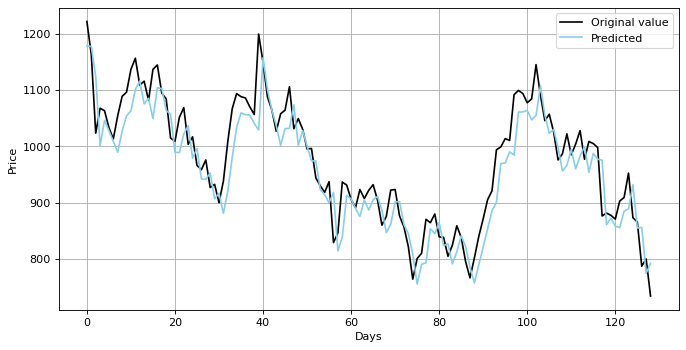

In [175]:
pred = GRUs.model.predict(x_test)
output = scaler.inverse_transform(pred)

plotting(org_vals,output)

Changed!
Changed!
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 8)                 320       
                                                                 
 dense_63 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 8)                 320       
                                                                 
 dense_63 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

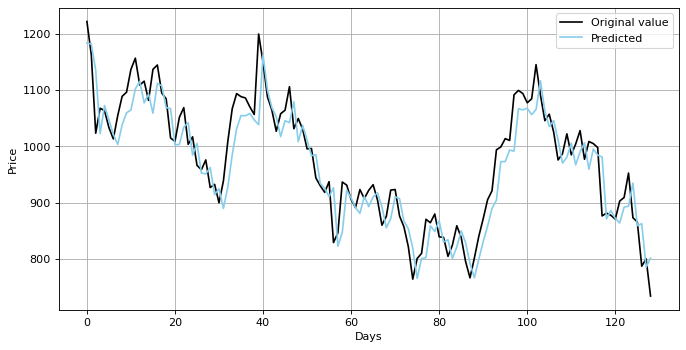

Changed!
Changed!
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 10)                480       
                                                                 
 dense_64 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 10)                480       
                                                                 
 dense_64 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

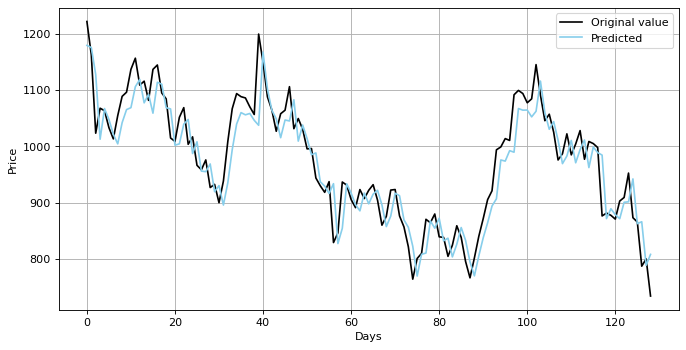

Changed!
Changed!
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 12)                672       
                                                                 
 dense_65 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 12)                672       
                                                                 
 dense_65 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

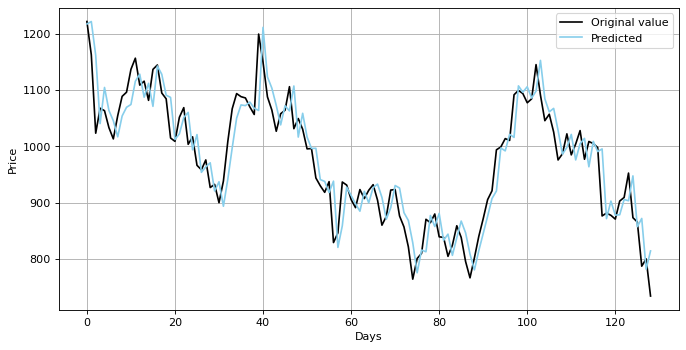

Changed!
Changed!
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 8)                 320       
                                                                 
 dense_66 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 8)                 320       
                                                                 
 dense_66 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

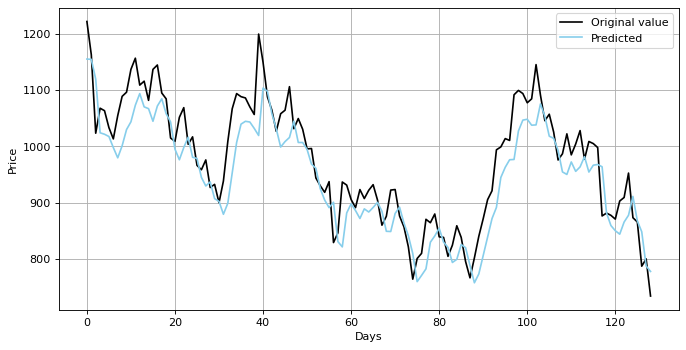

Changed!
Changed!
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 10)                480       
                                                                 
 dense_67 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 10)                480       
                                                                 
 dense_67 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

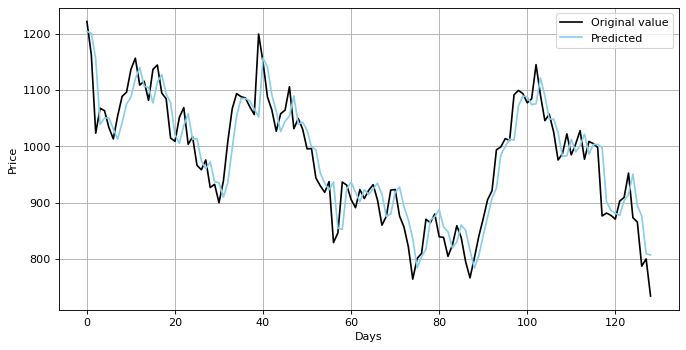

Changed!
Changed!
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 12)                672       
                                                                 
 dense_68 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 12)                672       
                                                                 
 dense_68 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

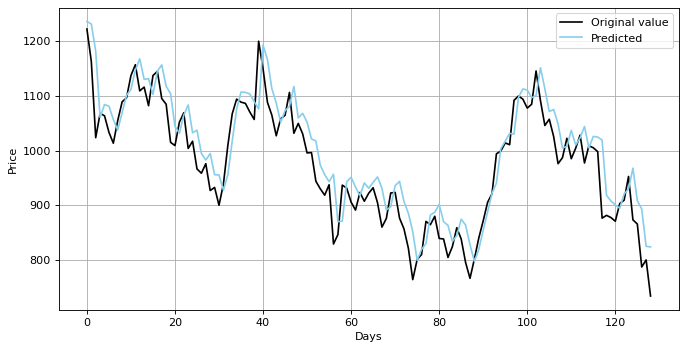

Changed!
Changed!
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 8)                 320       
                                                                 
 dense_69 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 8)                 320       
                                                                 
 dense_69 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

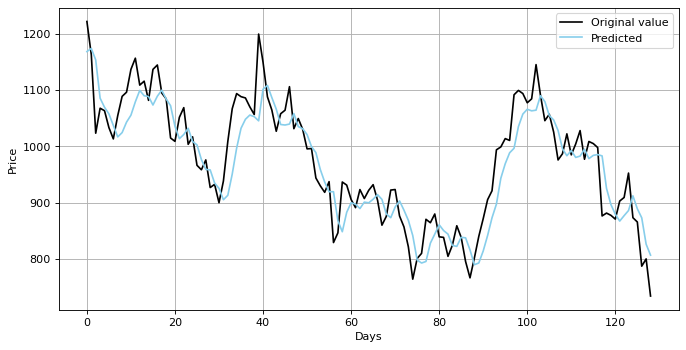

Changed!
Changed!
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 10)                480       
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 10)                480       
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

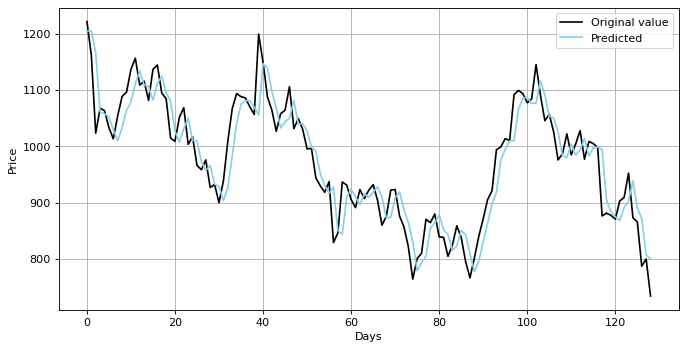

Changed!
Changed!
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 12)                672       
                                                                 
 dense_71 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 12)                672       
                                                                 
 dense_71 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

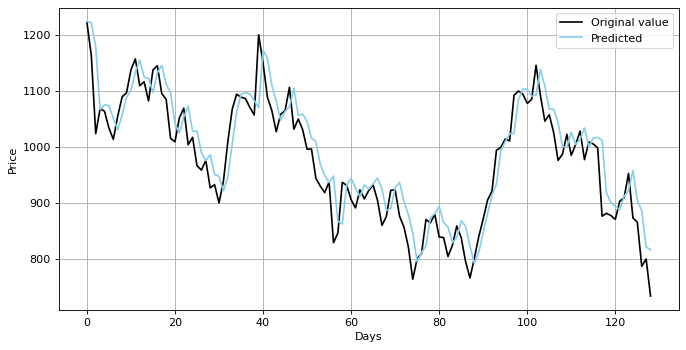

Changed!
Changed!
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 8)                 320       
                                                                 
 dense_72 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 8)                 320       
                                                                 
 dense_72 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

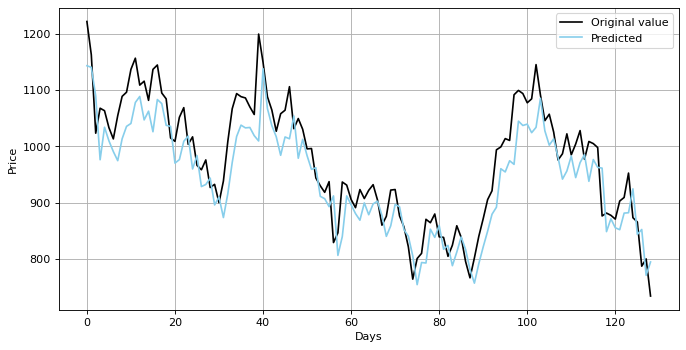

Changed!
Changed!
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 10)                480       
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 10)                480       
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

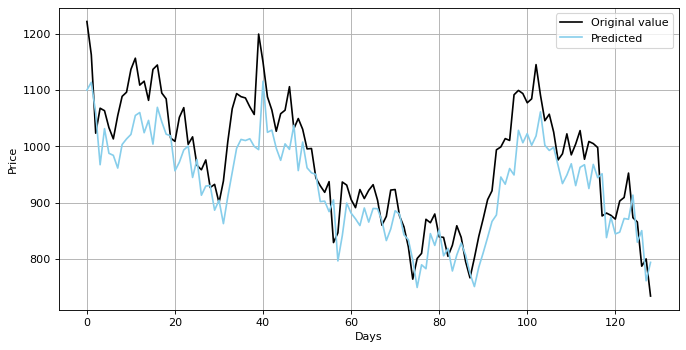

Changed!
Changed!
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 12)                672       
                                                                 
 dense_74 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 12)                672       
                                                                 
 dense_74 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

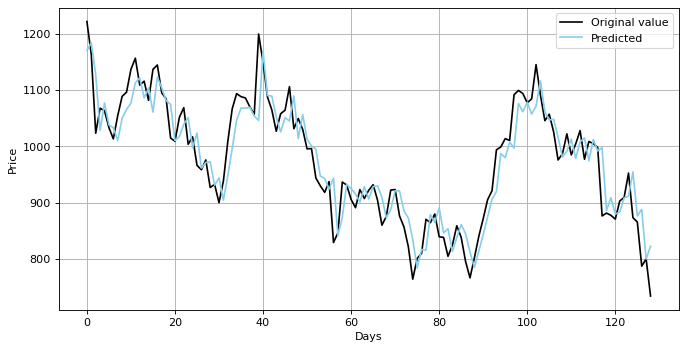

Changed!
Changed!
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 8)                 320       
                                                                 
 dense_75 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 8)                 320       
                                                                 
 dense_75 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

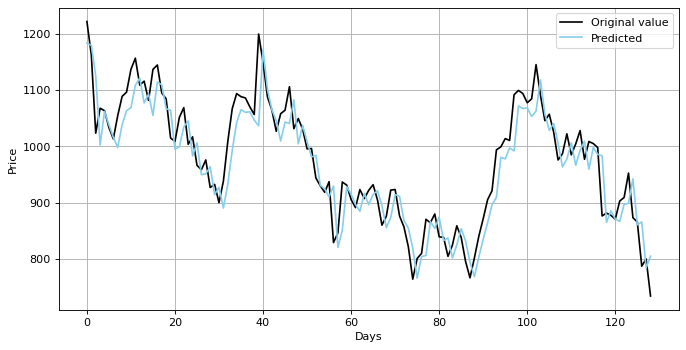

Changed!
Changed!
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 10)                480       
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 10)                480       
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

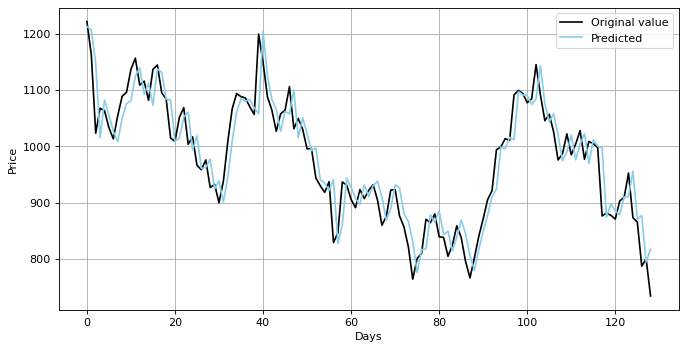

Changed!
Changed!
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 12)                672       
                                                                 
 dense_77 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 12)                672       
                                                                 
 dense_77 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

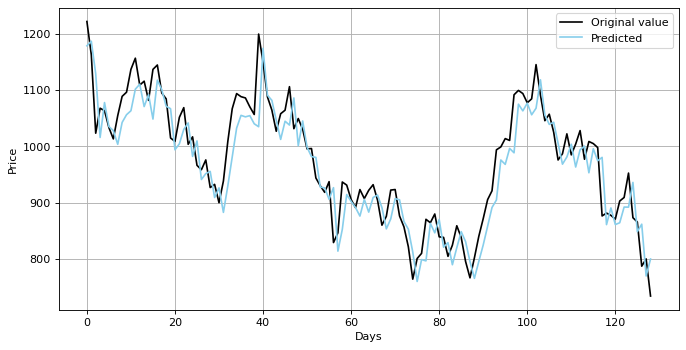

Changed!
Changed!
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 8)                 320       
                                                                 
 dense_78 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 8)                 320       
                                                                 
 dense_78 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

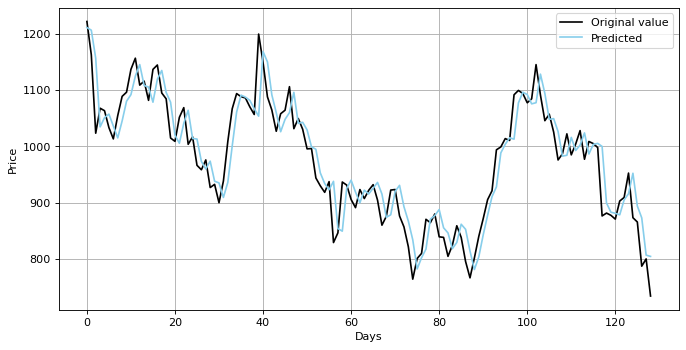

Changed!
Changed!
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 10)                480       
                                                                 
 dense_79 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 10)                480       
                                                                 
 dense_79 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

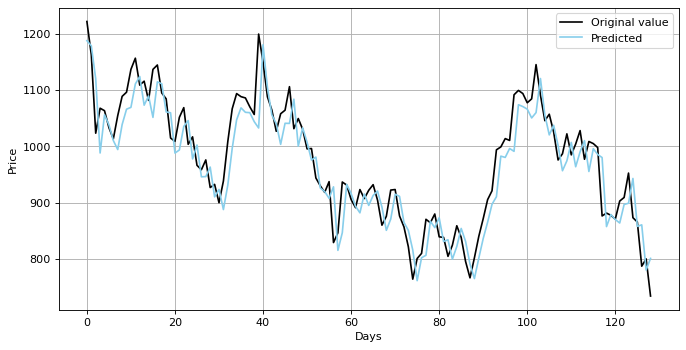

Changed!
Changed!
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (None, 12)                672       
                                                                 
 dense_80 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (None, 12)                672       
                                                                 
 dense_80 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

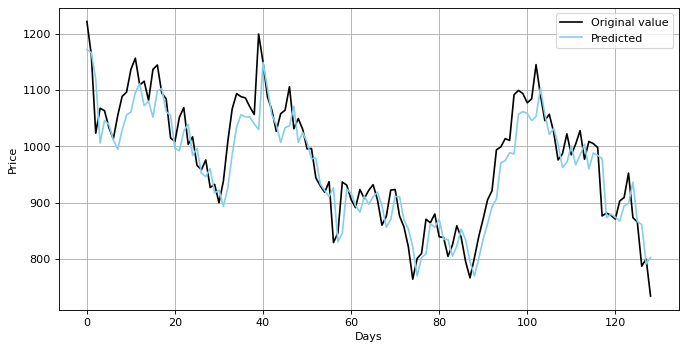

Changed!
Changed!
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 8)                 320       
                                                                 
 dense_81 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 8)                 320       
                                                                 
 dense_81 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

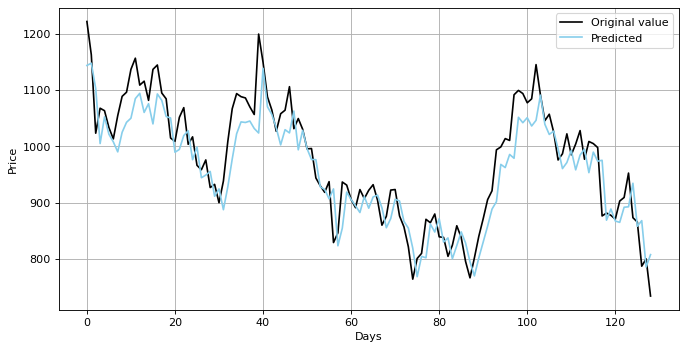

Changed!
Changed!
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 10)                480       
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 10)                480       
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

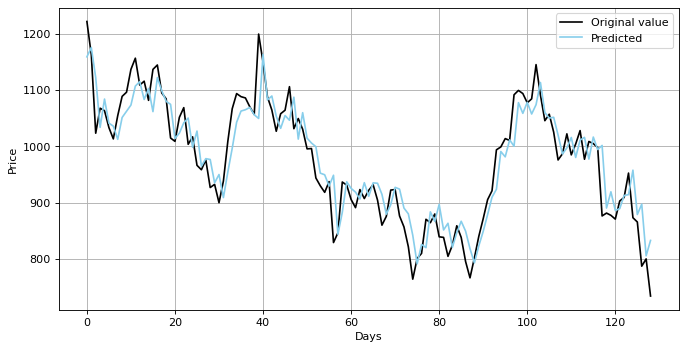

Changed!
Changed!
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 12)                672       
                                                                 
 dense_83 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 12)                672       
                                                                 
 dense_83 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

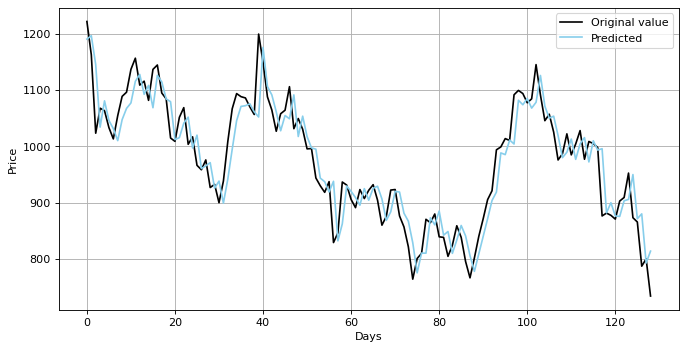

Changed!
Changed!
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 8)                 320       
                                                                 
 dense_84 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 8)                 320       
                                                                 
 dense_84 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

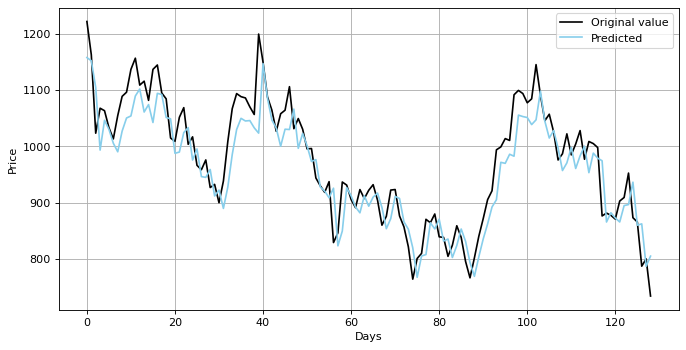

Changed!
Changed!
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 10)                480       
                                                                 
 dense_85 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 10)                480       
                                                                 
 dense_85 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

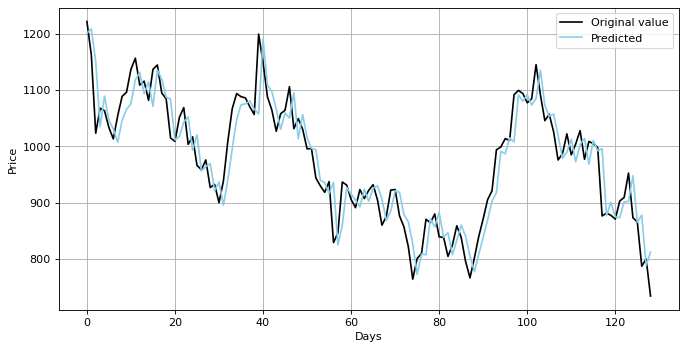

Changed!
Changed!
Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_53 (LSTM)              (None, 12)                672       
                                                                 
 dense_86 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_53 (LSTM)              (None, 12)                672       
                                                                 
 dense_86 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

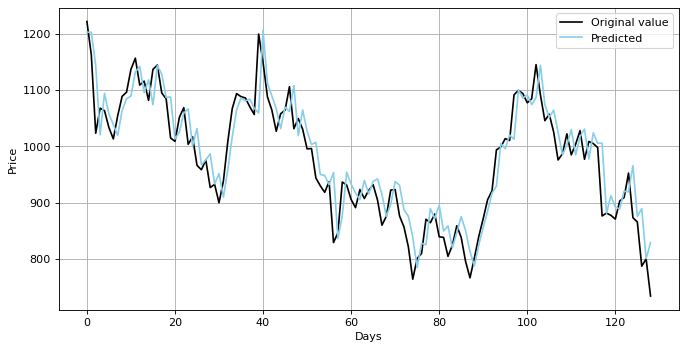

Changed!
Changed!
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 8)                 320       
                                                                 
 dense_87 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 8)                 320       
                                                                 
 dense_87 (Dense)            (None, 1)                 9         
                                                                 
Total params: 

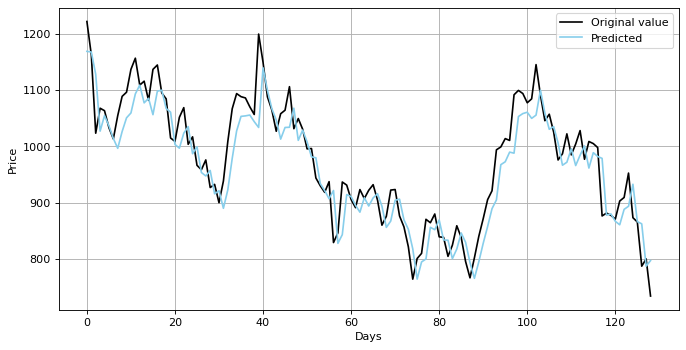

Changed!
Changed!
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 10)                480       
                                                                 
 dense_88 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 10)                480       
                                                                 
 dense_88 (Dense)            (None, 1)                 11        
                                                                 
Total params: 

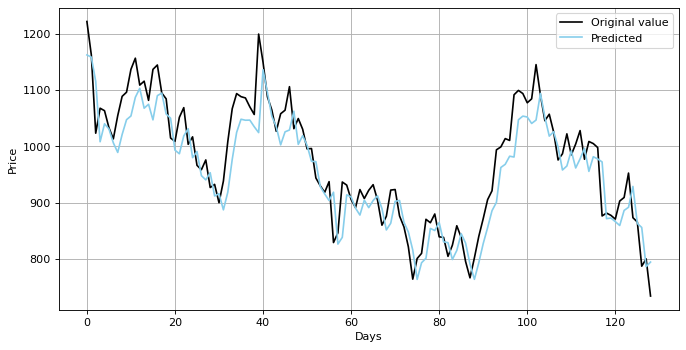

Changed!
Changed!
Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 12)                672       
                                                                 
 dense_89 (Dense)            (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 12)                672       
                                                                 
 dense_89 (Dense)            (None, 1)                 13        
                                                                 
Total params: 

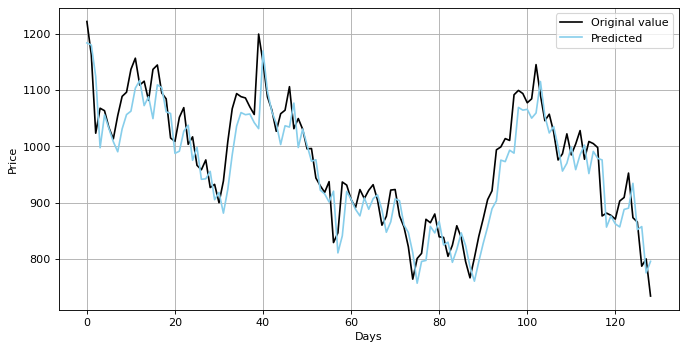

In [176]:
for epch in [60,100,120]:
    for batch in [2,4,6]:
        for neurons in [8,10,12]:
            LSTM2 = LstmModel(x_train,y_train,epoch=epch)
            LSTM2.changeBatchSize(batch)
            LSTM2.changeNeurons(neurons)

            LSTM2.buildArchitecture()
            LSTM2.compiler()
            history = LSTM2.modelfit()

            pred = LSTM2.model.predict(x_test)
            output = scaler.inverse_transform(pred)
            

            print("For epch {} and batch {}".format(epch,batch))
            plotting(org_vals,output)